<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-2/blob/main/P3_AIML425_Assn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import torch

num_samples = 100000

# Input: 1D Uniform distribution
y = np.random.uniform(-1, 1, num_samples)

# Output: 2D Gaussian
mu = [0, 0]
cov = [[1, 0], [0, 1]]
z = np.random.multivariate_normal(mu, cov, num_samples)

# Split data into train, test, validation
train_y, train_z = y[:int(0.7 * num_samples)], z[:int(0.7 * num_samples)]
test_y, test_z = y[int(0.7 * num_samples):int(0.85 * num_samples)], z[int(0.7 * num_samples):int(0.85 * num_samples)]
val_y, val_z = y[int(0.85 * num_samples):], z[int(0.85 * num_samples):]


In [39]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()


In [40]:
criterion = torch.nn.MSELoss()  # mean squared error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

epochs = 50
batch_size = 128

# To save training and validation loss for each epoch
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()  # set the model to training mode
    train_loss = 0.0
    for i in range(0, len(train_y), batch_size):
        y_batch = torch.tensor(train_y[i:i+batch_size]).float().unsqueeze(-1)
        z_batch = torch.tensor(train_z[i:i+batch_size]).float()

        optimizer.zero_grad()
        outputs = model(y_batch)
        loss = criterion(outputs, z_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_losses.append(train_loss / (len(train_y) // batch_size))

    # Validation
    model.eval()  # set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for i in range(0, len(val_y), batch_size):
            y_val = torch.tensor(val_y[i:i+batch_size]).float().unsqueeze(-1)
            z_val = torch.tensor(val_z[i:i+batch_size]).float()

            outputs_val = model(y_val)
            loss_val = criterion(outputs_val, z_val)

            val_loss += loss_val.item()

    val_losses.append(val_loss / (len(val_y) // batch_size))

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# Save losses to a file (optional)
np.save('train_losses.npy', train_losses)
np.save('val_losses.npy', val_losses)


Epoch 1/50, Train Loss: 0.9947, Val Loss: 1.0054
Epoch 2/50, Train Loss: 0.9943, Val Loss: 1.0054
Epoch 3/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 4/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 5/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 6/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 7/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 8/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 9/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 10/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 11/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 12/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 13/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 14/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 15/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 16/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 17/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 18/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 19/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 20/50, Train Loss: 0.9942, Val Loss: 1.0053
Epoch 21/

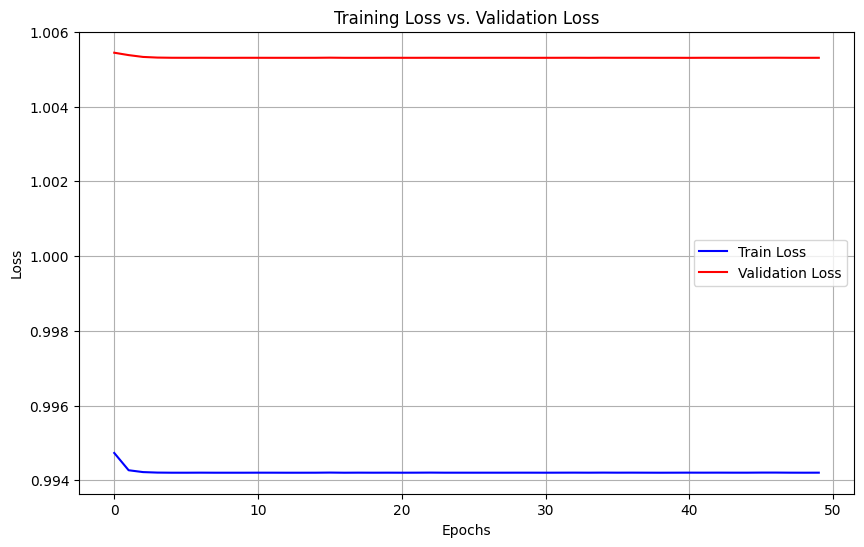

In [41]:
import numpy as np

# Load losses from saved files
train_losses = np.load('train_losses.npy')
val_losses = np.load('val_losses.npy')

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
model.eval()  # set the model to evaluation mode

test_outputs = []
with torch.no_grad():
    for i in range(0, len(test_y), batch_size):
        y_test_batch = torch.tensor(test_y[i:i+batch_size]).float().unsqueeze(-1)
        outputs_test = model(y_test_batch).numpy()
        test_outputs.extend(outputs_test)

test_outputs = np.array(test_outputs)


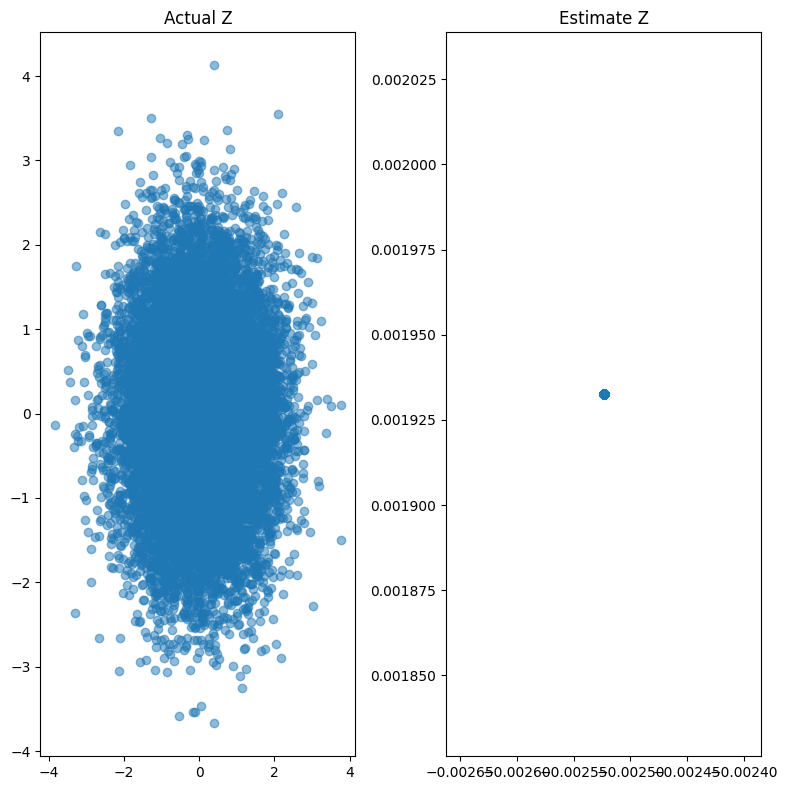

In [43]:
import matplotlib.pyplot as plt

# Convert train data to 2D Gaussian
z_out = model(torch.tensor(train_y).float().unsqueeze(-1)).detach().numpy()

plt.figure(figsize=(8, 8))

# Plot original 1D Uniform Y
plt.subplot(1, 2, 1)
plt.scatter(test_z[:, 0], test_z[:, 1], alpha=0.5)
plt.title("Actual Z")

# Plot converted 2D Gaussian Z
plt.subplot(1, 2, 2)
plt.scatter(test_outputs[:, 0], test_outputs[:, 1], alpha=0.5)
plt.title("Estimate Z")
plt.tight_layout()
plt.show()
